LIFE EXPECTANCY:  DATA ANALYSIS

Note - This is the Individual Jupyter Notebook to merge into the MASTER Data Analysis Jupyter Notebook

### How do the two lifestyle factors (alcohol consumption, BMI) relate to life expectancy?

In [16]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib notebook

file = "../cleaned_data_output.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Country,Year,Status,Population,Life Expectancy,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
0,0,Afghanistan,2015,Developing,33736494.0,65.0,263.0,83,62,0.1,...,6.0,17.3,17.2,0.01,19.1,584.259210,71.279624,8.16,0.479,10.1
1,1,Afghanistan,2014,Developing,327582.0,59.9,271.0,86,64,0.1,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,2,Afghanistan,2013,Developing,31731688.0,59.9,268.0,89,66,0.1,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,3,Afghanistan,2012,Developing,3696958.0,59.5,272.0,93,69,0.1,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,4,Afghanistan,2011,Developing,2978599.0,59.2,275.0,97,71,0.1,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5


In [26]:
#Set the index as the 'status' of each country
status_df = df.set_index("Status")

#Separate developed/developing countries
developing = status_df.loc['Developing']
developed = status_df.loc['Developed']

#Gather data from Alcohol and Life Expectancy columns
developed_alcohol = developed.groupby('Country')['Alcohol'].mean()
developed_life_expectancy = developed.groupby('Country')['Life Expectancy'].mean()

developing_alcohol = developing.groupby('Country')['Alcohol'].mean()
developing_life_expectancy = developing.groupby('Country')['Life Expectancy'].mean()

years = developed['Year'].unique()
years1 = developing['Year'].unique()

<IPython.core.display.Javascript object>


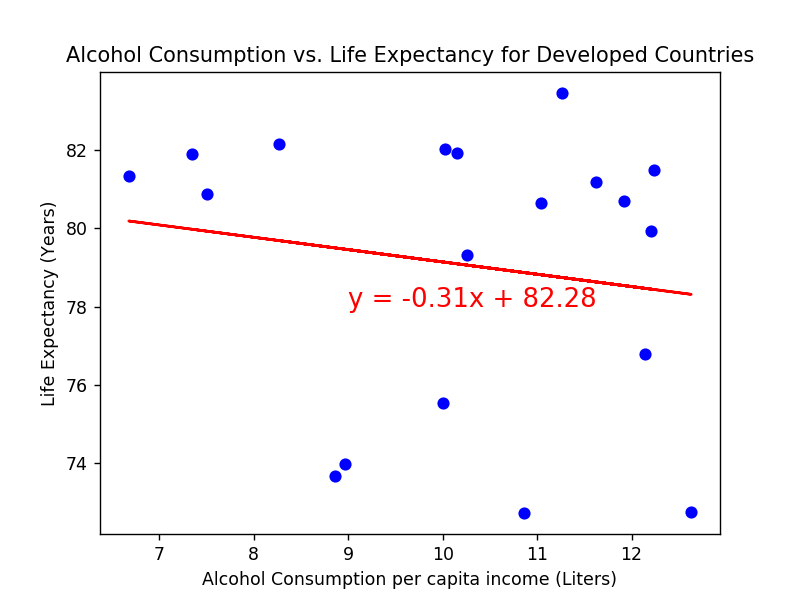

The Correlation (R) is: -0.16042725727340218


In [34]:
#Plot Alcohol vs. Life Expectancy for developed countries
fig1 = plt.figure(1)
dev_alc_graph = plt.scatter(developed_alcohol, developed_life_expectancy, color='blue')
plt.title("Alcohol Consumption vs. Life Expectancy for Developed Countries")
plt.xlabel("Alcohol Consumption per capita income (Liters)")
plt.ylabel("Life Expectancy (Years)")
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(developed_alcohol, developed_life_expectancy)
regress_values = developed_alcohol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(developed_alcohol,regress_values,"r-")
plt.annotate(line_eq,(9,78),fontsize=15,color="red")
print(f"The Correlation (R) is: {rvalue}")
plt.show()

In [28]:
plt.close(fig1)

<IPython.core.display.Javascript object>


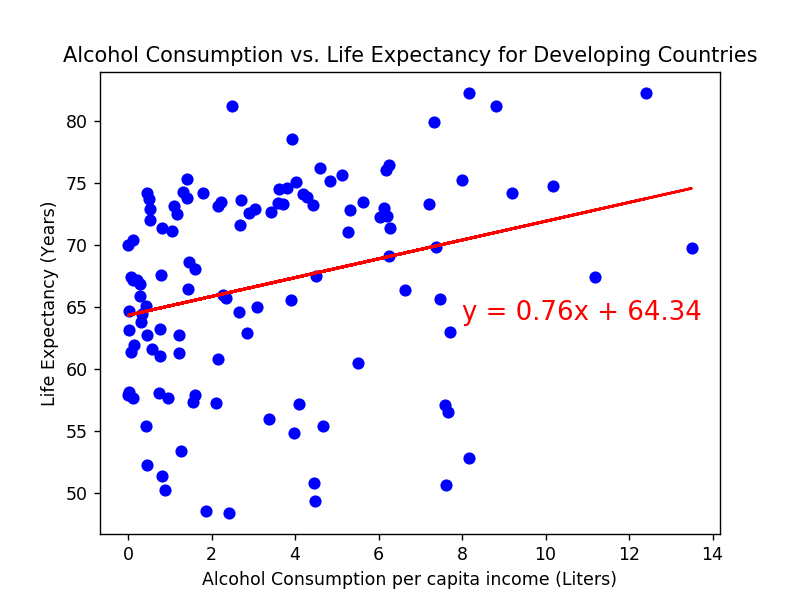

The Correlation (R) is: 0.2768643646889079


In [37]:
#Plot Alcohol vs. Life Expectancy for developing countries
fig2 = plt.figure(2)
deving_alc_graph = plt.scatter(developing_alcohol, developing_life_expectancy, color='blue')
plt.title("Alcohol Consumption vs. Life Expectancy for Developing Countries")
plt.xlabel("Alcohol Consumption per capita income (Liters)")
plt.ylabel("Life Expectancy (Years)")
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(developing_alcohol, developing_life_expectancy)
regress_values = developing_alcohol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(developing_alcohol,regress_values,"r-")
plt.annotate(line_eq,(8,64),fontsize=15,color="red")
print(f"The Correlation (R) is: {rvalue}")
plt.show()

In [30]:
plt.close(fig2)